# TF-IDF

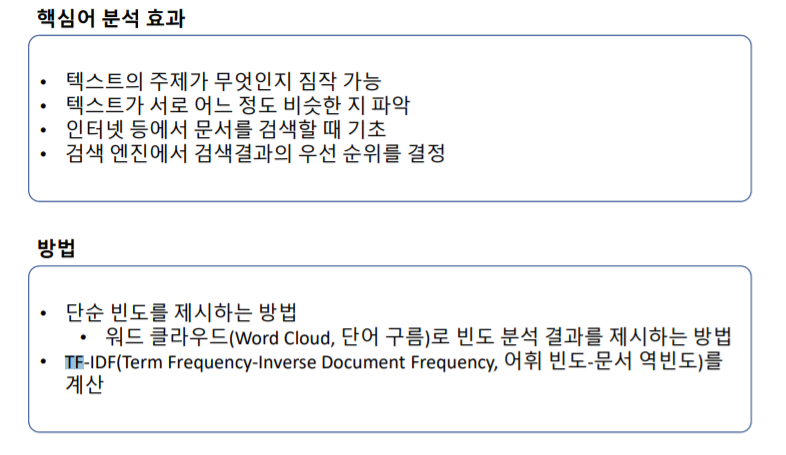

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [
    "I like animals",
    "I like food",
    "I hate math",
    "I want to study math",
]

# TF-IDF로 벡터화
# 1글자도 인식이 되도록 토큰 패턴 변경
tf_idf = TfidfVectorizer(token_pattern = r"(?u)\b\w+\b")
tf_idf.fit(documents)

print(tf_idf.vocabulary_)

{'i': 3, 'like': 4, 'animals': 0, 'food': 1, 'hate': 2, 'math': 5, 'want': 8, 'to': 7, 'study': 6}


In [2]:
# 다른 문서에도 많이 나온 단어는 낮은 수치
tf_idf.transform(["I like animals"]).toarray()

array([[0.72664149, 0.        , 0.        , 0.37919167, 0.5728925 ,
        0.        , 0.        , 0.        , 0.        ]])

In [4]:
# 같은 문서에 많이 나온 단어는 높은 수치
tf_idf.transform(["I like animals and love animals"]).toarray()


array([[0.90406978, 0.        , 0.        , 0.23589056, 0.3563895 ,
        0.        , 0.        , 0.        , 0.        ]])

# TF-IDF with smart phone

In [3]:
'''
어휘가 다른 문서에는 별로 등장하지 않고 특정 문서에만 집중적으로 등장할 때 그 어휘야말로 실질적으로 그 문서의 주제를 잘 담고 있는 핵심어라 할 수 있다.
'''
import pandas as pd
df = pd.read_csv('./data/smartphone.csv', encoding='utf-8')
galexy_posts = df.get('Title')# + " " + df.get('Description')
galexy_posts

0                           셀카봉 스마트폰 삼각대 블루투스 굿
1              스마트폰을 웹캠으로 사용하기 (Driodcam/드로이드캠)
2                    스마트폰 원격시동 경보기 마이키 링크 아반떼MD
3      연이어 출시된 삼성 가성비 스마트폰 갤럭시 A31과 A51, 어떤... 
4             핸드폰 방수팩 스마트폰 방수케이스로 15M잠수도 문제 없어.
                         ...                   
995                                 스마트폰 동영상 공격
996                 다이소 자전거 휴대폰 거치대 (핸드폰, 스마트폰)
997        변색 유리로 카메라를 숨기는 독특한 OnePlus 컨셉원 스마트폰
998                    시노링크 호헴 아이스테디 스마트폰짐벌 개봉기
999                      초등학생용 스마트폰 미니(mini) 리뷰
Name: Title, Length: 1000, dtype: object

In [4]:
from konlpy.tag import Mecab
tagger = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")

galexy_stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 중 북 수 팩 년 월 저 탭"
galexy_stop_words = galexy_stop_words.split(' ')
galexy_stop_words[0:10]

# 불용어 제거
galexy_nouns = []
for post in galexy_posts:
    for noun in tagger.nouns(post):
        if noun not in galexy_stop_words:
            galexy_nouns.append(noun)

galexy_nouns[0:10]

from collections import Counter
num_top_nouns = 10
galexy_nouns_counter = Counter(galexy_nouns)
galexy_top_nouns = dict(galexy_nouns_counter.most_common(num_top_nouns))
galexy_top_nouns

{'스마트폰': 1030,
 '갤럭시': 84,
 '삼각대': 70,
 '사진': 68,
 '삼성': 60,
 '사용': 56,
 '카메라': 43,
 '방법': 41,
 '거치대': 40,
 '활용': 35}

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
galexy_tfidv = TfidfVectorizer(stop_words=["스마트폰"]).fit(galexy_top_nouns)
galexy_tfidv.vocabulary_

{'갤럭시': 0,
 '삼각대': 5,
 '사진': 4,
 '삼성': 6,
 '사용': 3,
 '카메라': 7,
 '방법': 2,
 '거치대': 1,
 '활용': 8}

In [7]:
galexy_posts

0                           셀카봉 스마트폰 삼각대 블루투스 굿
1              스마트폰을 웹캠으로 사용하기 (Driodcam/드로이드캠)
2                    스마트폰 원격시동 경보기 마이키 링크 아반떼MD
3      연이어 출시된 삼성 가성비 스마트폰 갤럭시 A31과 A51, 어떤... 
4             핸드폰 방수팩 스마트폰 방수케이스로 15M잠수도 문제 없어.
                         ...                   
995                                 스마트폰 동영상 공격
996                 다이소 자전거 휴대폰 거치대 (핸드폰, 스마트폰)
997        변색 유리로 카메라를 숨기는 독특한 OnePlus 컨셉원 스마트폰
998                    시노링크 호헴 아이스테디 스마트폰짐벌 개봉기
999                      초등학생용 스마트폰 미니(mini) 리뷰
Name: Title, Length: 1000, dtype: object

In [6]:
galexy_tfidv.transform(galexy_posts).toarray()

print(pd.DataFrame(galexy_tfidv.transform(galexy_posts).toarray()))

            0    1    2    3    4    5         6    7    8
0    0.000000  0.0  0.0  0.0  0.0  1.0  0.000000  0.0  0.0
1    0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0
2    0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0
3    0.707107  0.0  0.0  0.0  0.0  0.0  0.707107  0.0  0.0
4    0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0
..        ...  ...  ...  ...  ...  ...       ...  ...  ...
995  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0
996  0.000000  1.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0
997  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0
998  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0
999  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0

[1000 rows x 9 columns]


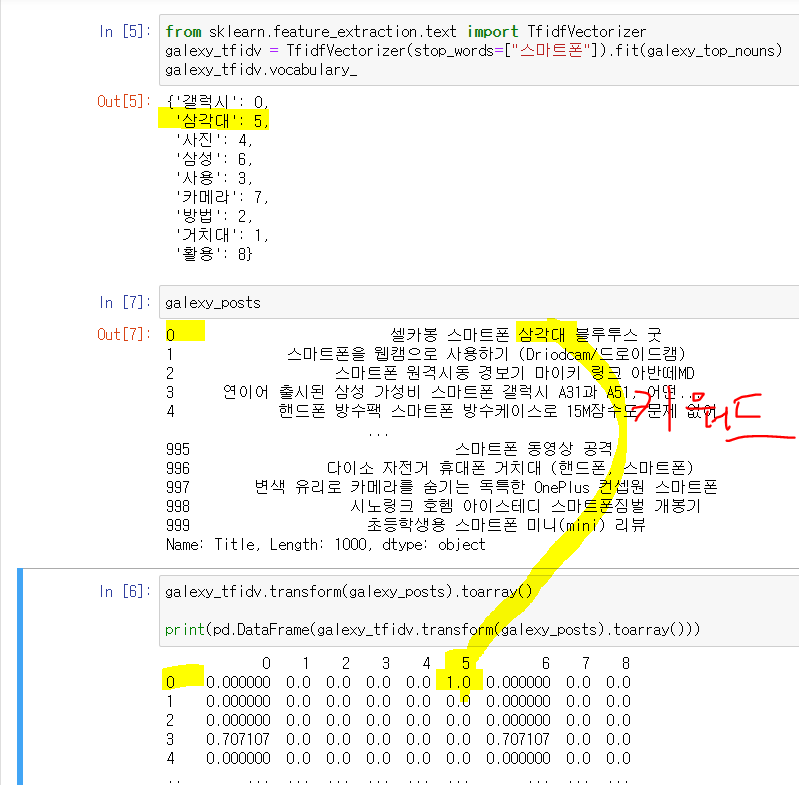